# Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Introducci√≥n

## Introducci√≥n al problema

La optimizaci√≥n de la producci√≥n agr√≠cola es un pilar fundamental para la sostenibilidad y competitividad del sector agroindustrial. Para el Ingenio La Providencia, la variabilidad en el rendimiento de la ca√±a por hect√°rea (TCH) y en la calidad de la materia prima (medida por el % de sacarosa) representa un desaf√≠o constante en la planificaci√≥n de sus operaciones. Esta incertidumbre puede afectar directamente la log√≠stica de la cosecha, la eficiencia de los procesos en planta y, en √∫ltima instancia, la rentabilidad del negocio.

El presente proyecto aborda este desaf√≠o mediante la aplicaci√≥n de t√©cnicas de machine learning sobre los datos hist√≥ricos del ingenio. El objetivo principal es desarrollar modelos predictivos capaces de estimar con precisi√≥n dos indicadores cr√≠ticos:

1.  **Las Toneladas de Ca√±a por Hect√°rea (TCH)**, para anticipar el volumen de producci√≥n.
2.  **El Porcentaje de Sacarosa (%Sac.Ca√±a)**, para prever la calidad y el potencial de az√∫car extra√≠ble.

Adicionalmente, se busca crear un sistema de clasificaci√≥n que categorice el desempe√±o de los cultivos en niveles **alto, medio y bajo** para ambas variables. La implementaci√≥n exitosa de estos modelos permitir√° al Ingenio La Providencia pasar de una toma de decisiones reactiva a una estrategia proactiva, optimizando la gesti√≥n de recursos, mejorando la planificaci√≥n de la zafra y maximizando tanto la productividad como la calidad de su producci√≥n.

## Descripci√≥n del Conjunto de Datos



Los datos provenientes de la base de datos **`HISTORICO_SUERTES.xlsx`** conforman un registro detallado de las operaciones agr√≠colas y los resultados de producci√≥n del Ingenio La Providencia. Se presume que cada fila representa un evento de cosecha para una "suerte" (lote de cultivo) espec√≠fica. El conjunto de variables puede interpretarse y agruparse en las siguientes categor√≠as funcionales:

### 1. Variables de Identificaci√≥n y Agron√≥micas Fundamentales
Este grupo de variables permite identificar de manera √∫nica cada lote y describe sus caracter√≠sticas f√≠sicas y de cultivo.
* **Identificadores:** `Hacienda`, `Nombre` y `Suerte` funcionan como el identificador √∫nico de cada parcela. `Zona` y `Dist Km` la sit√∫an geogr√°ficamente y establecen su distancia a la planta, un factor log√≠stico clave.
* **Caracter√≠sticas del Cultivo:** `Area Neta` define la superficie productiva del lote. Variables como `Suelo`, `Variedad`, `F.Siembra`, y `Cod.Estado` (que indica el n√∫mero de corte, ej. "Plantilla" para la primera siembra o "Corte 2" para la segunda cosecha) son fundamentales, ya que definen el potencial gen√©tico y el ciclo de vida del cultivo.

### 2. Variables de Manejo y Pr√°cticas Agr√≠colas
Aqu√≠ se registran las intervenciones humanas y las decisiones de manejo que influyen directamente en el desarrollo y la maduraci√≥n de la ca√±a.
* **Labores Culturales:** Se documentan pr√°cticas clave como el riego (`Num.Riegos`, `M3 Riego`, `Ult.Riego`), la fertilizaci√≥n (`Fert.Nitrogen.`, `Urea 46%`, `Vinaza`) y el uso de madurantes qu√≠micos (`Producto`, `Dosis Madurante`), que son palancas cr√≠ticas para optimizar el rendimiento.
* **Cosecha:** Variables como `Tipo Quema` (verde o quemada) y `T.Corte` (mecanizado o manual) describen el m√©todo de cosecha, el cual tiene un impacto directo en la calidad de la materia prima que llega al ingenio.

### 3. Variables de Producci√≥n y Calidad (Variables Objetivo)
Este es el grupo m√°s importante, ya que contiene los indicadores de desempe√±o que se busca predecir.
* **Productividad:** La variable principal es **`TCH` (Toneladas de Ca√±a por Hect√°rea)**, que mide el rendimiento agr√≠cola del lote. Est√° directamente relacionada con `TonUltCorte`, que es la producci√≥n total en toneladas.
* **Calidad:** La variable clave de calidad es **`%Sac.Ca√±a`**, que representa el porcentaje de sacarosa en la ca√±a y determina su valor para la producci√≥n de az√∫car. Se complementa con otras m√©tricas como `Rdto` (Rendimiento industrial) y `%ATR` (Az√∫cares Totales Recuperables), que tambi√©n reflejan la eficiencia en la extracci√≥n de az√∫car.

### 4. Variables Clim√°ticas y Ambientales
El desempe√±o de un cultivo depende en gran medida del entorno. Este grupo de variables busca capturar esas condiciones.
* **Clima:** Se registran datos meteorol√≥gicos cruciales como `Lluvias`, `Temp. Media`, `Humedad Rel Media` y `Radiacion Solar`. Es notable que estas variables est√°n agregadas en diferentes ventanas de tiempo (ej. `0-3 meses`, `Ciclo completo`), lo que permite analizar c√≥mo las condiciones clim√°ticas en distintas etapas fenol√≥gicas del cultivo afectan el resultado final.
* **Sanidad:** La variable `%Infest.Diatrea` es un indicador de la salud del cultivo, midiendo el impacto de una de las plagas m√°s significativas de la ca√±a de az√∫car.

La base de datos **`BD_IPSA_1940.xlsx`** proporciona un conjunto de variables consolidadas, orientadas a la tarea de clasificaci√≥n del desempe√±o de los lotes. A diferencia del set de datos hist√≥ricos para regresi√≥n, este parece estar m√°s enfocado en factores agron√≥micos clave y los resultados finales de cosecha. Cada fila representa un evento de cosecha para una variedad espec√≠fica, CC01-1940.

Las variables presentes pueden agruparse e interpretarse de la siguiente manera:

### 1. Variables de Identificaci√≥n y Caracter√≠sticas del Cultivo
Este grupo de variables permite identificar el lote y define sus condiciones agron√≥micas b√°sicas.
* **Identificadores:** `NOME`, `FAZ` (Hacienda) y `TAL` (Talh√£o o Suerte) identifican la unidad productiva espec√≠fica.
* **Caracter√≠sticas Agron√≥micas:** `variedad` especifica el tipo de ca√±a. `tipocorte` describe el m√©todo de cosecha. `cortes` indica el n√∫mero de cosechas que ha tenido la planta (su ciclo de soca), y `edad` representa la edad del cultivo en meses al momento del corte, dos factores determinantes en la productividad.

### 2. Variables de Manejo de Maduraci√≥n
Un conjunto de variables est√° dedicado exclusivamente a la pr√°ctica de maduraci√≥n qu√≠mica, sugiriendo su importancia como factor predictivo.
* `madurada`: Es una variable categ√≥rica (SI/NO) que indica si se aplic√≥ o no un producto para inducir la maduraci√≥n.
* `producto`, `dosismad` (Dosis del Madurante) y `semsmad` (Semanas desde la aplicaci√≥n hasta la cosecha): Detallan el tipo de madurante utilizado, la cantidad y el tiempo de acci√≥n, lo que permite evaluar la efectividad de esta pr√°ctica agr√≠cola.

### 3. Indicadores de Desempe√±o y Calidad (Variables a Clasificar)
Estas son las variables centrales del problema. A partir de ellas se construir√°n las categor√≠as de "alto", "medio" y "bajo" rendimiento.
* **Variables Objetivo (Continuas):** **`TCH` (Toneladas de Ca√±a por Hect√°rea)** y **`sacarosa` (%)** son los indicadores directos de la productividad agr√≠cola y la calidad industrial, respectivamente. Estos valores ser√°n la base para crear las etiquetas de clasificaci√≥n.
* **Indicadores Adicionales:** `pct_diatrea` (% de infestaci√≥n de Diatraea) y `me` (probablemente Materia Extra√±a) son m√©tricas que reflejan la sanidad y limpieza del cultivo, factores que impactan negativamente tanto el TCH como la sacarosa. `vejez` podr√≠a indicar el tiempo en horas o d√≠as entre el corte y la molienda, un factor cr√≠tico para la calidad.

### 4. Variables de Contexto Temporal y Ambiental
Este grupo final de variables sit√∫a cada cosecha en un contexto espec√≠fico.
* `mes` y `periodo`: Definen el momento exacto de la cosecha, permitiendo analizar la estacionalidad.
* `lluvias`: Es una variable clim√°tica fundamental que resume las precipitaciones acumuladas en un periodo relevante para la cosecha.
* `grupo_tenencia`: Es una variable categ√≥rica que probablemente se refiere al tipo de propiedad o administraci√≥n del lote (ej. propio, arrendado), lo cual puede implicar diferencias en las estrategias de manejo.

# Modelo de Regresi√≥n

## An√°lisis Exploratorio de Datos (EDA)

In [2]:
# Opci√≥n para ver TODAS las filas (None significa sin l√≠mite)
pd.set_option('display.max_rows', None)

# Opci√≥n para ver TODAS las columnas (None significa sin l√≠mite)
pd.set_option('display.max_columns', None)

# Opci√≥n para aumentar el ancho de la l√≠nea y evitar que se corte la tabla
pd.set_option('display.width', 1000)

In [3]:
file_name = 'data/HISTORICO_SUERTES.xlsx'

df = pd.read_excel(file_name)

df.head(3)

Per√≠odo  Hacienda           Nombre  Zona  Tenencia Suerte       Suelo  Area Neta  Dist Km   Variedad  Cod.Estado # Cod.Estado  F.Siembra  D.S.  Ult.Riego  Edad Ult Cos F.Ult.Corte  Destino 1=Semilla  Cod. T.Cultivo Cultivo Fec.Madur.                            Producto  Dosis Madurante  Semanas mad.  TonUltCorte         TCH       TCHM  Ton.Azucar     Rdto        TAH      TAHM  Sac.Ca√±a Precosecha  Edad.Precosecha  %Sac.Ca√±a  %Sac.Muestreadora     %ATR       KATRHM  %Fibra Ca√±a  %AR Jugo  %ME Min  %ME Veg  %ME Tot     Brix   Pureza   Vejez    Tipo Quema     T.Corte    Cerca de Cosech√≥  Num.Riegos  M3 Riego  DDUlt.Riego  Lluvias (2 Meses Ant.)  Lluvias Ciclo  Lluvias 0 -3  Lluvias tres a seis  Lluvias seis a nueve  Luvias 9 -FC  %Infest.Diatrea  Fosfato Jugo  Fert.Nitrogen.  Urea 46%  MEZ  Boro Granul.  MicroZinc  NITO_XTEND  Sul.Amonio  NITRAX-S  Vinaza Codigo Estacion  Temp. Media 0-3  Temp. Media Ciclo  Temp Max Ciclo  Temp Min Ciclo  Humedad Rel Media 0-3   \
0   201701     80493        LA CONCHA  IP02      51.0   002A   CANTARINA       6.00      4.3    CC85-92             5    Corte 5 2010-08-20   NaN        NaT         12.81  2017-01-02                  0             1.0  Normal 2016-11-04  BONUS 250 EC REGULADOR FISIOL√ìGICO              1.0      8.428571       727.19  121.198333   9.461228      86.050  11.8332  14.341666  1.119567              16.8172              NaN    13.7582             13.508  15.1653  1434.823641       16.910      0.84    0.355   10.198   10.553  15.7464  87.2241   2.735         VERDE  MECANIZADO  El Cerrito    AI08         NaN       0.0            0                   258.0         1038.0           0.0                454.0                 102.0         482.0              NaN         178.0             NaN       NaN  NaN           NaN        NaN         NaN         NaN       NaN     NaN             NaN              NaN                NaN             NaN             NaN                     NaN   
1   201701     81284  UKRANIA INCAUCA  IP05      81.0   039B         NaN       1.45      NaN    CC85-92             5    Corte 5 2011-01-27   NaN        NaT         11.14  2017-01-02                  0             1.0  Normal        NaT                                 NaN              0.0           NaN       136.00   93.793103   8.419488      14.728  10.8294  10.157241  0.911781                  NaN              NaN    12.8430             12.551  14.0410  1182.180399       16.936      0.55    2.298    7.273    9.571  15.2240  84.3602  73.823  Q.ACCIDENTAL      MANUAL  Candelaria    AI08         NaN       0.0            0                     0.0            0.0           0.0                  0.0                   0.0           0.0              NaN         382.0             NaN       NaN  NaN           NaN        NaN         NaN         NaN       NaN     NaN             NaN              NaN                NaN             NaN             NaN                     NaN   
2   201701     80203    EL AMPARO SAA  IP05      31.0    007  CORINTIAS        8.24     23.0  CC01-1228             4    Corte 4 2011-10-25  1.65 2016-09-17         12.32  2017-01-02                  0             1.0  Normal 2016-11-04  BONUS 250 EC REGULADOR FISIOL√ìGICO              1.1      8.428571      1436.62  174.347087  14.151549     145.268  10.1117  17.629611  1.430974              14.7749            12.02    11.9364             11.940  13.1236  1857.192723       15.512      0.61    3.000    9.323   12.323  14.1130  84.4527   2.108         VERDE  MECANIZADO     Palmira    AI08         5.0   48513.6          107                   246.0         1002.0         106.0                326.0                 113.0         457.0              NaN         226.0             NaN       NaN  NaN           NaN        NaN         NaN         NaN       NaN     NaN             NaN              NaN                NaN             NaN             NaN                     NaN   

   Humedad Rel Media Ciclo  Oscilacion Temp Med 0-3  Oscilacion Temp Ciclo  Sum

In [4]:
df.describe()

Per√≠odo      Hacienda      Tenencia     Area Neta       Dist Km  Cod.Estado #                      F.Siembra                      Ult.Riego  Edad Ult Cos                    F.Ult.Corte  Destino 1=Semilla  Cod. T.Cultivo                     Fec.Madur.  Dosis Madurante  Semanas mad.   TonUltCorte           TCH          TCHM    Ton.Azucar          Rdto           TAH          TAHM  Sac.Ca√±a Precosecha  Edad.Precosecha     %Sac.Ca√±a  %Sac.Muestreadora          %ATR        KATRHM   %Fibra Ca√±a      %AR Jugo      %ME Min       %ME Veg       %ME Tot          Brix        Pureza         Vejez   Num.Riegos       M3 Riego   DDUlt.Riego  Lluvias (2 Meses Ant.)  Lluvias Ciclo  Lluvias 0 -3  Lluvias tres a seis  Lluvias seis a nueve  Luvias 9 -FC  %Infest.Diatrea   Fosfato Jugo  Fert.Nitrogen.      Urea 46%          MEZ  Boro Granul.    MicroZinc    NITO_XTEND    Sul.Amonio      NITRAX-S         Vinaza  Temp. Media 0-3  Temp. Media Ciclo  Temp Max Ciclo  Temp Min Ciclo  \
count   21027.000000  21027.000000  21026.000000  21027.000000  21022.000000  21027.000000                          21027                           8470   21027.00000                          21027       21027.000000    21025.000000                          11252     20923.000000  11252.000000  21027.000000  21027.000000  21027.000000  20786.000000  20760.000000  20786.000000  20786.000000         19929.000000      8919.000000  20578.000000       19169.000000  20505.000000  20505.000000  19169.000000  18903.000000  19305.00000  19307.000000  19307.000000  20760.000000  20758.000000  18582.000000  8438.000000   21027.000000  21027.000000            21027.000000   21027.000000  21027.000000         21027.000000          21027.000000  21027.000000      5600.000000   19169.000000             0.0  7.230000e+02   971.000000   1285.000000  1149.000000   3679.000000   1357.000000    748.000000    4098.000000      4530.000000        4530.000000     4530.000000     4530.000000   
mean   202039.708708  80679.334427     46.448730      8.642948     25.311806      4.261806  2015-03-11 18:18:44.839492096  2020-02-16 21:24:26.351829760      13.01111  2020-10-27 09:01:09.339420672           0.013982        1.036100  2020-08-26 19:50:03.626021888         0.536335      9.588708   1141.737477    129.608509     10.050417    124.249246     10.733766     13.888988      1.071335             7.802876        12.360247     12.320202          12.834918     13.718671   1372.453892     15.275538      0.737819      0.63653      7.761020      8.600761     13.130479     77.805153     12.294125     7.215691   25725.851363     45.997717               75.116456     526.176110    122.333534           120.193700            118.080529    165.606631         3.811395     332.501252             NaN  1.848838e+04   481.805869    118.158210   128.934639   2360.857856   2447.356346   1530.278591   74481.323472        23.375724          24.556072       34.587837       15.416313   
min    201701.000000  80100.000000     11.000000      0.004000      1.100000      0.000000            1986-04-30 00:00:00            2016-01-12 00:00:00       1.31000            2017-01-02 00:00:00           0.000000        1.000000            2016-08-12 00:00:00         0.000000     -2.000000      0.420000      1.573653      0.138403      0.000000      0.000000      0.000000      0.000000             0.000000         0.000000      7.086000           0.000000      7.750000     49.089172      0.000000      0.100000      0.00000      0.000000      0.200000      0.000000      0.000000      0.017000     1.000000       0.000000      0.000000                0.000000       0.000000      0.000000             0.000000              0.000000      0.000000         0.000000       0.000000             NaN  1.900000e+01     1.000000      1.000000     1.000000     33.000000      7.000000      1.300000       5.921000        22.040000          22.353000       32.600000       13.900000   
25%    201812.000000  80247.000000     31.000000      3.310000     12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Per√≠odo                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.S

## Preparaci√≥n de datos

In [6]:
# 1. Identifica las variables o columnas en el dataset con valores nulos
columnas_con_nulos = [
    (columna, df[columna].isnull().sum())
    for columna in df.columns
    if df[columna].isnull().sum() > 0
]
# 2. Convertir la lista a un DataFrame de pandas para una mejor visualizaci√≥n
df_nulos = pd.DataFrame(columnas_con_nulos, columns=['Columna', 'Cantidad de Nulos'])

# Ordenar los resultados de mayor a menor
df_nulos_ordenado = df_nulos.sort_values(by='Cantidad de Nulos', ascending=False)


# Imprimir el DataFrame resultante
print("\nResultados en una tabla ordenada de mayor a menor:")
df_nulos_ordenado


Resultados en una tabla ordenada de mayor a menor:


Columna  Cantidad de Nulos
51  Sum Oscilacion Temp Ciclo              21027
33             Fert.Nitrogen.              21027
34                   Urea 46%              20304
40                   NITRAX-S              20279
35                        MEZ              20056
37                  MicroZinc              19878
36               Boro Granul.              19742
39                 Sul.Amonio              19670
38                 NITO_XTEND              17348
41                     Vinaza              16929
50      Oscilacion Temp Ciclo              16497
49    Oscilacion Temp Med 0-3              16497
52         Radicion Solar 0-3              16497
44          Temp. Media Ciclo              16497
45             Temp Max Ciclo              16497
46             Temp Min Ciclo              16497
47     Humedad Rel Media 0-3               16497
48    Humedad Rel Media Ciclo              16497
43            Temp. Media 0-3              16497
57          Evaporacion Ciclo              16497
56            Evaporacion 0-3              16497
54          Precipitacion 0_3              16497
55        Precipitacion Ciclo              16497
53      Radiacion Solar Ciclo              16497
31            %Infest.Diatrea              15427
42            Codigo Estacion              14742
3                        D.S.              13859
30                 Num.Riegos              12589
4                   Ult.Riego              12557
16            Edad.Precosecha              12108
8                    Producto               9778
10               Semanas mad.               9775
7                  Fec.Madur.               9775
1                       Suelo               3758
28                      Vejez               2445
22                   %AR Jugo               2124
32               Fosfato Jugo               1858
18          %Sac.Muestreadora               1858
21                %Fibra Ca√±a               1858
23                    %ME Min               1722
25                    %ME Tot               1720
24                    %ME Veg               1720
15        Sac.Ca√±a Precosecha               1098
20                     KATRHM                522
19                       %ATR                522
17                  %Sac.Ca√±a                449
27                     Pureza                269
12                       Rdto                267
26                       Brix                267
11                 Ton.Azucar                241
13                        TAH                241
14                       TAHM                241
29                   Cerca de                126
9             Dosis Madurante                104
2                     Dist Km                  5
6                     Cultivo                  2
5              Cod. T.Cultivo                  2
0                    Tenencia                  1

### **An√°lisis de Datos Faltantes y Estrategia de Mitigaci√≥n**

Tras una revisi√≥n de la completitud de los datos para los **21,027 registros** del dataset, es evidente que existe un problema significativo de valores nulos que debe ser abordado antes de cualquier modelado. La estrategia para manejar estos datos se basar√° en el porcentaje de informaci√≥n faltante por columna, dividiendo el proceso en tres fases jer√°rquicas para asegurar la integridad y robustez del conjunto de datos final.

---

#### **Fase 1: Eliminaci√≥n de Columnas Irrecuperables (> 75% de Nulos)**
Un gran n√∫mero de columnas, principalmente relacionadas con datos de fertilizantes y mediciones clim√°ticas espec√≠ficas (`Sum Oscilacion Temp Ciclo`, `Fert.Nitrogen.`, `Urea 46%`, etc.), presentan m√°s de un 75% de valores ausentes, llegando en algunos casos a estar completamente vac√≠as. Intentar imputar tal cantidad de datos ser√≠a equivalente a fabricar informaci√≥n, lo que comprometer√≠a gravemente la validez de cualquier an√°lisis posterior.

* **Acci√≥n:** Estas columnas ser√°n **eliminadas directamente** del dataset. Su escasa informaci√≥n no justifica el riesgo de introducir sesgos a trav√©s de una imputaci√≥n masiva.

In [7]:
# 1. Calcular el n√∫mero total de filas en tu DataFrame
total_filas = len(df)

# 2. Definir el umbral del 75%
umbral = total_filas * 0.75

# 3. Identificar las columnas que tienen m√°s nulos que el umbral
columnas_a_eliminar = [
    columna for columna in df.columns 
    if df[columna].isnull().sum() > umbral
]

# (Opcional pero recomendado) Imprimir las columnas que se van a eliminar
print(f"Se encontraron {len(columnas_a_eliminar)} columnas para eliminar con m√°s del 75% de nulos:")
print(columnas_a_eliminar)
print(f"\nDimensiones originales del DataFrame: {df.shape}")

# 4. Eliminar esas columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar)

# 5. Verificar el resultado
print(f"Dimensiones del nuevo DataFrame limpio: {df.shape}")

Se encontraron 24 columnas para eliminar con m√°s del 75% de nulos:
['Fert.Nitrogen.', 'Urea 46%', 'MEZ', 'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo', 'Sum Oscilacion Temp Ciclo', 'Radicion Solar 0-3', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo']

Dimensiones originales del DataFrame: (21027, 85)
Dimensiones del nuevo DataFrame limpio: (21027, 61)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Per√≠odo                 21027 non-null  int64         
 1   Hacienda                21027 non-null  int64         
 2   Nombre                  21027 non-null  object        
 3   Zona                    21027 non-null  object        
 4   Tenencia                21026 non-null  float64       
 5   Suerte                  21027 non-null  object        
 6   Suelo                   17269 non-null  object        
 7   Area Neta               21027 non-null  float64       
 8   Dist Km                 21022 non-null  float64       
 9   Variedad                21027 non-null  object        
 10  Cod.Estado #            21027 non-null  int64         
 11  Cod.Estado              21027 non-null  object        
 12  F.Siembra               21027 non-null  datet

---

#### **Fase 2: Imputaci√≥n Estrat√©gica para Columnas con Nulos Moderados (10% - 75%)**
Columnas como `Edad.Precosecha` (~58% nulos), `Num.Riegos` (~60% nulos) y `Suelo` (~18% nulos) contienen informaci√≥n potencialmente valiosa, pero con una cantidad considerable de datos faltantes. La estrategia aqu√≠ ser√° m√°s matizada y depender√° de la naturaleza de la variable.

* **Para variables categ√≥ricas:** Se imputar√° utilizando la **moda** asumiendo que es la condici√≥n m√°s probable. Alternativamente, se podr√≠a crear una categor√≠a "Desconocido" si se sospecha que la ausencia del dato es informativa.
* **Para variables num√©ricas:** Se imputar√° utilizando la **mediana** o la **media** dependiendo de cual sea mas conveniente con respecto a los datos

In [9]:
# Calcular umbrales de 10% y 75%
total_filas = len(df)
umbral_inferior = total_filas * 0.10
umbral_superior = total_filas * 0.75

total_columnas_fase2 = [
    col for col in df.columns
    if (df[col].isnull().sum() > umbral_inferior) and \
       (df[col].isnull().sum() < umbral_superior)
]

print(f"Se analizar√°n {len(total_columnas_fase2)} columnas en la Fase 2:")
df[total_columnas_fase2].info()

Se analizar√°n 12 columnas en la Fase 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suelo            17269 non-null  object        
 1   D.S.             7168 non-null   object        
 2   Ult.Riego        8470 non-null   datetime64[ns]
 3   Fec.Madur.       11252 non-null  datetime64[ns]
 4   Producto         11249 non-null  object        
 5   Semanas mad.     11252 non-null  float64       
 6   Edad.Precosecha  8919 non-null   float64       
 7   %AR Jugo         18903 non-null  float64       
 8   Vejez            18582 non-null  float64       
 9   Num.Riegos       8438 non-null   float64       
 10  %Infest.Diatrea  5600 non-null   float64       
 11  Codigo Estacion  6285 non-null   object        
dtypes: datetime64[ns](2), float64(6), object(4)
memory usage: 1.9+ MB


#### Numericas

--- An√°lisis de 'Semanas mad.' ---
  - Asimetr√≠a (Skewness): 3.43
  - Media: 9.59
  - Mediana: 8.57


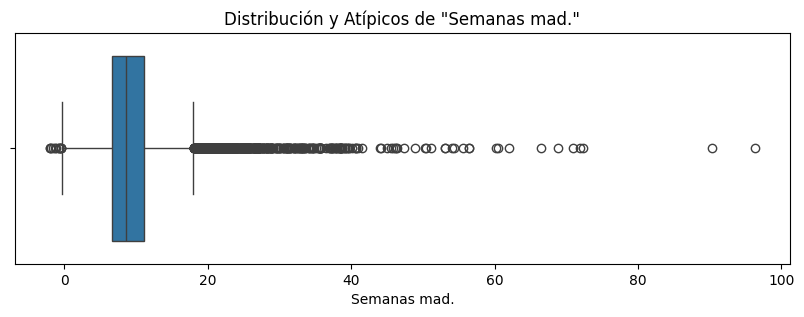



--- An√°lisis de 'Edad.Precosecha' ---
  - Asimetr√≠a (Skewness): -0.84
  - Media: 12.36
  - Mediana: 12.09


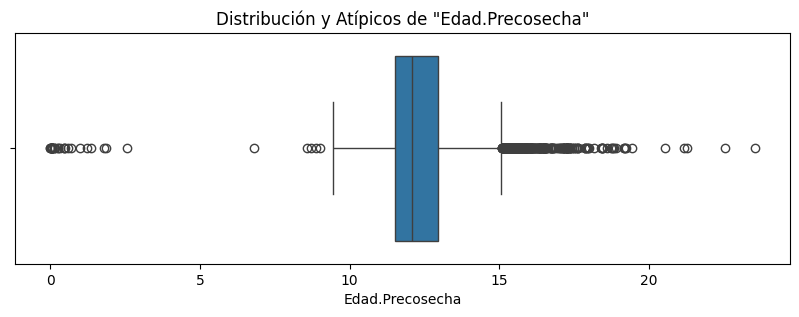



--- An√°lisis de '%AR Jugo' ---
  - Asimetr√≠a (Skewness): 1.18
  - Media: 0.74
  - Mediana: 0.70


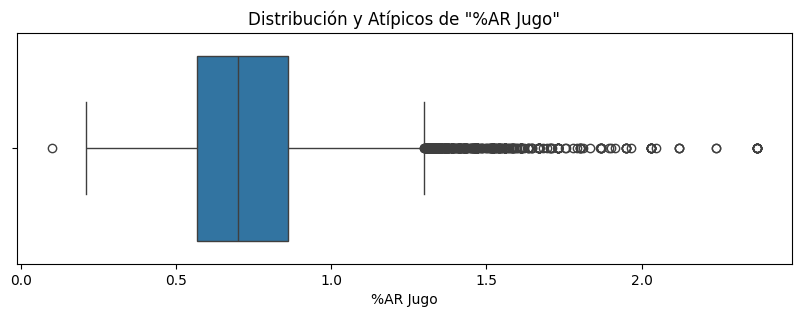



--- An√°lisis de 'Vejez' ---
  - Asimetr√≠a (Skewness): 2.90
  - Media: 12.29
  - Mediana: 2.74


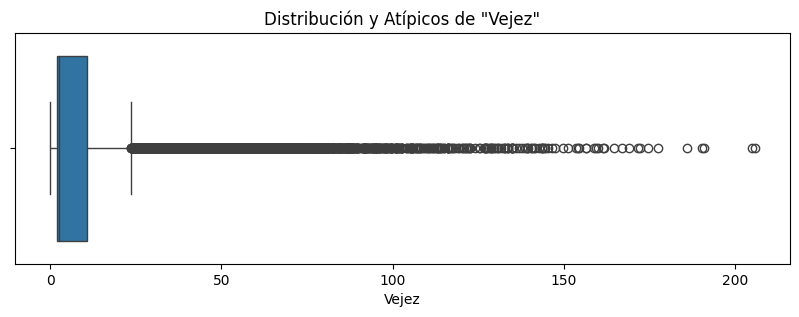



--- An√°lisis de 'Num.Riegos' ---
  - Asimetr√≠a (Skewness): 10.54
  - Media: 7.22
  - Mediana: 5.00


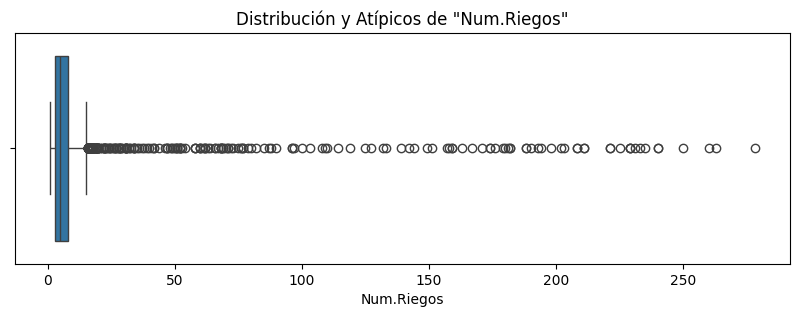



--- An√°lisis de '%Infest.Diatrea' ---
  - Asimetr√≠a (Skewness): 2.36
  - Media: 3.81
  - Mediana: 3.14


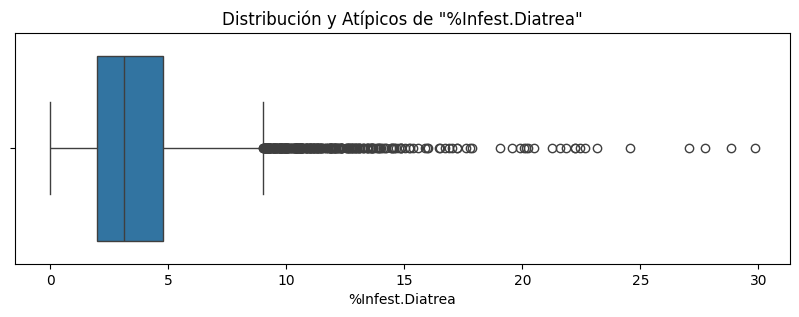

In [10]:
# Iteramos sobre cada columna para analizarla individualmente

columnas_fase2 = [
    col for col in total_columnas_fase2
    if df[col].dtype in ['int64', 'float64']
]

for columna in columnas_fase2:
    # --- C√°lculo de estad√≠sticas ---
    asimetria = df[columna].skew()
    media = df[columna].mean()
    mediana = df[columna].median()
    
    print(f"--- An√°lisis de '{columna}' ---")
    print(f"  - Asimetr√≠a (Skewness): {asimetria:.2f}")
    print(f"  - Media: {media:.2f}")
    print(f"  - Mediana: {mediana:.2f}")
    
    # --- Visualizaci√≥n del Boxplot ---
    plt.figure(figsize=(10, 3)) # Crea una figura nueva para cada gr√°fico
    sns.boxplot(x=df[columna])
    plt.title(f'Distribuci√≥n y At√≠picos de "{columna}"')
    plt.show() # Muestra el gr√°fico en la salida de la celda
    print("\n") # Agrega un espacio para mayor claridad

In [11]:
# Listas para clasificar las columnas
columnas_para_mediana = []
columnas_para_media = []

# Umbral de asimetr√≠a para decidir. Si |asimetr√≠a| > 1.0, se considera muy asim√©trica.
umbral_asimetria = 1.0

# Clasificamos cada columna bas√°ndonos en su asimetr√≠a
for columna in columnas_fase2:
    asimetria = df[columna].skew()
    
    if abs(asimetria) > umbral_asimetria:
        columnas_para_mediana.append(columna)
    else:
        columnas_para_media.append(columna)

print("--- Clasificaci√≥n Final para Imputaci√≥n ---")
print(f"‚úÖ Columnas a imputar con MEDIANA (distribuci√≥n asim√©trica):")
print(f"   {columnas_para_mediana}")
print(f"\n‚úÖ Columnas a imputar con MEDIA (distribuci√≥n sim√©trica):")
print(f"   {columnas_para_media}")

--- Clasificaci√≥n Final para Imputaci√≥n ---
‚úÖ Columnas a imputar con MEDIANA (distribuci√≥n asim√©trica):
   ['Semanas mad.', '%AR Jugo', 'Vejez', 'Num.Riegos', '%Infest.Diatrea']

‚úÖ Columnas a imputar con MEDIA (distribuci√≥n sim√©trica):
   ['Edad.Precosecha']


In [12]:
# Imputar con la MEDIANA
if columnas_para_mediana:
    mediana_imputacion = df[columnas_para_mediana].median()
    df[columnas_para_mediana] = df[columnas_para_mediana].fillna(mediana_imputacion)
    print("-> Valores nulos imputados con la MEDIANA.")

# Imputar con la MEDIA
if columnas_para_media:
    media_imputacion = df[columnas_para_media].mean()
    df[columnas_para_media] = df[columnas_para_media].fillna(media_imputacion)
    print("-> Valores nulos imputados con la MEDIA.")


df[columnas_para_mediana].info()
df[columnas_para_media].info()

-> Valores nulos imputados con la MEDIANA.
-> Valores nulos imputados con la MEDIA.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Semanas mad.     21027 non-null  float64
 1   %AR Jugo         21027 non-null  float64
 2   Vejez            21027 non-null  float64
 3   Num.Riegos       21027 non-null  float64
 4   %Infest.Diatrea  21027 non-null  float64
dtypes: float64(5)
memory usage: 821.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edad.Precosecha  21027 non-null  float64
dtypes: float64(1)
memory usage: 164.4 KB


#### Categoricas

--- An√°lisis de Distribuci√≥n para: 'Suelo' ---
Conteo de valores (incluyendo nulos):
Suelo
CORINTIAS               4042
NaN                     3758
GALPON                  2282
PALMIRA                 1457
MANUELITA                742
NUEVO PICHICHI           599
CERRITO                  431
BURRIGA                  415
PALMERAS                 407
SANTA ROSA               336
RIO LA PAILA             285
GENOVA                   278
AMAIME                   272
JUANCHITO                239
GUADUAL                  236
BALLESTEROS              229
CERRITO-NIMA             227
JORDAN                   213
PALMICHE                 210
NIMA                     195
ESNEDA                   170
MARSELLA                 167
MARGARITA                158
TIBET                    156
GENOVEZ                  139
JAMAICA                  139
NARINO                   132
VILLA                    115
PALMIRITA                115
OVEJERA                  110
ESMERALDA                107
YUMBO   

C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_21492\648512961.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')


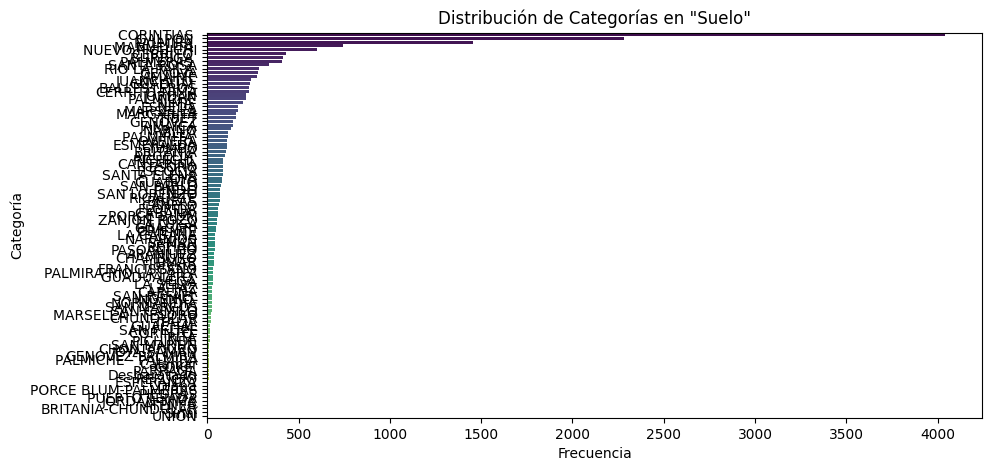



--- An√°lisis de Distribuci√≥n para: 'D.S.' ---
Conteo de valores (incluyendo nulos):
D.S.
NaN     13859
1.65     7148
DS         19
1.5         1
Name: count, dtype: int64




C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_21492\648512961.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')


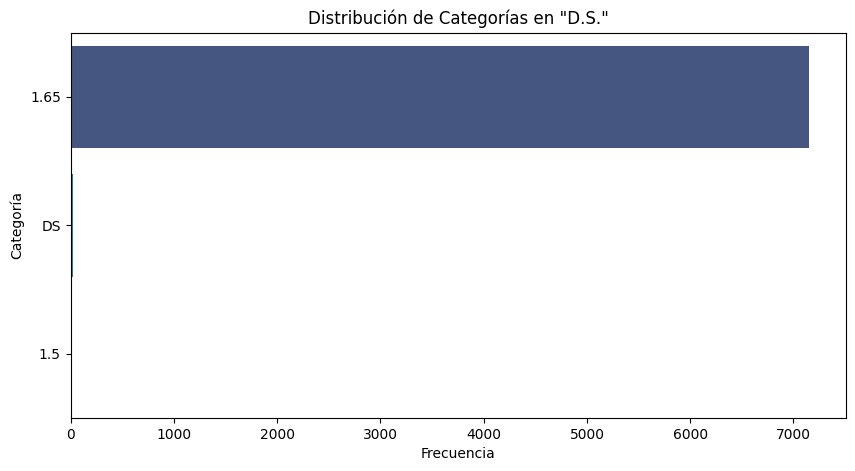



--- An√°lisis de Distribuci√≥n para: 'Producto' ---
Conteo de valores (incluyendo nulos):
Producto
NaN                                      9778
BONUS 250 EC REGULADOR FISIOL√ìGICO       7001
BONUS 250 EC REGULADOR FISIOLOGICO       3380
COADYUVANTE  DOUCE                        380
FERTILIZANTE LIQUIDO RENDIMIENTO          179
FUSILADE 2000 BL                           84
AGROFOSK-M                                 54
MADURANTE REGULADOR TRONNUSPAC 250 EC      36
FERTILIZANTE ORG√ÅNICO PATER-M              31
ROUND-UP MONSANTO 747 GRANULADO            29
baykal                                     22
PRODUCTO ENSAYO EN LITROS                  18
MADURANTE BIO SAFE ORGANIC                 17
TRANSLOK                                    7
OTROS MADURANTES                            4
GREEN LIFE                                  3
AMINA 2-4-D                                 2
HERBICIDA CLICK 40 SC                       1
GLIFOLAQ                                    1
Name: count, dtype: int

C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_21492\648512961.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')


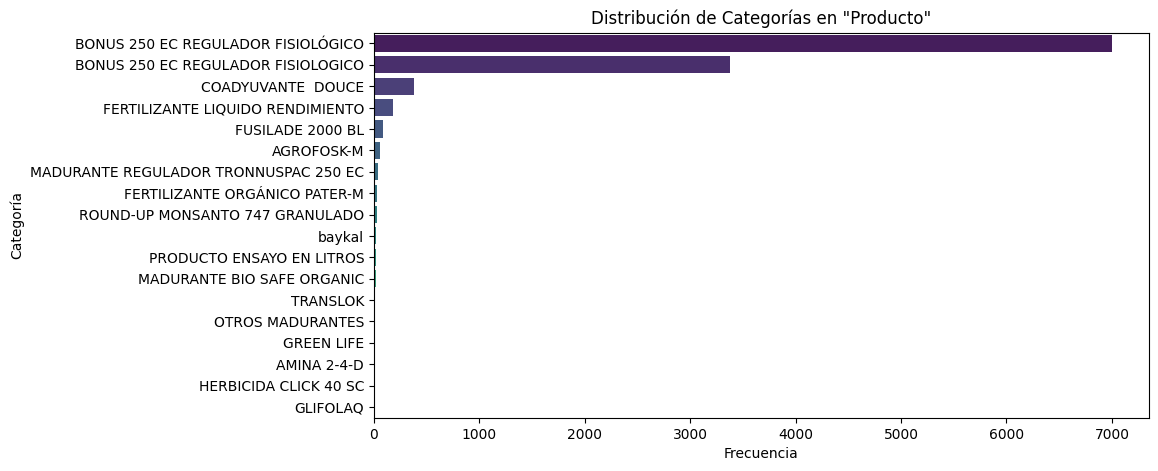

C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_21492\648512961.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')




--- An√°lisis de Distribuci√≥n para: 'Codigo Estacion' ---
Conteo de valores (incluyendo nulos):
Codigo Estacion
NaN    14742
999     1749
GUA      894
GIN      748
AMA      708
ROZ      641
MAR      318
YOT      310
AER      282
PLR      135
HON      110
PSJ       98
CAN       95
BUG       80
BLG       51
PTA       17
PRA       16
RIO       15
TUL       12
005        4
008        2
Name: count, dtype: int64




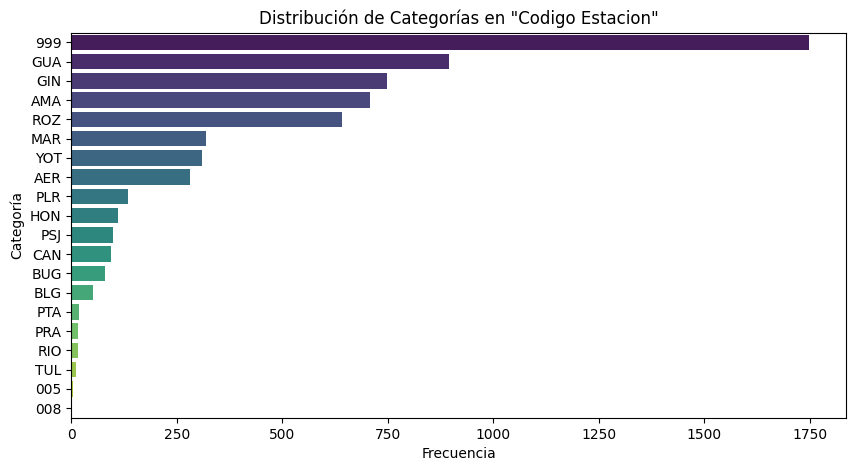

In [13]:
columnas_categoricas = [
    col for col in total_columnas_fase2
    if df[col].dtype == 'object'
]

for columna in columnas_categoricas:
    print(f"--- An√°lisis de Distribuci√≥n para: '{columna}' ---")
    
    # Muestra el conteo de cada categor√≠a, incluyendo los nulos (NaN)
    # Esto es clave para ver el panorama completo.
    print("Conteo de valores (incluyendo nulos):")
    print(df[columna].value_counts(dropna=False))
    print("\n")
    
    # Visualiza la distribuci√≥n con un gr√°fico de barras (countplot)
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[columna], order=df[columna].value_counts().index, palette='viridis')
    plt.title(f'Distribuci√≥n de Categor√≠as en "{columna}"')
    plt.xlabel('Frecuencia')
    plt.ylabel('Categor√≠a')
    plt.show() # Muestra el gr√°fico en la salida de la celda
    print("\n" + "="*50 + "\n")

---

#### **Fase 3: Imputaci√≥n Simple o Eliminaci√≥n de Filas (< 10% de Nulos)**
Finalmente, las columnas con un bajo porcentaje de datos faltantes (< 10%), como `Dist Km`, `Ton.Azucar`, y `Rdto`, son las m√°s sencillas de tratar. El impacto de la imputaci√≥n o eliminaci√≥n es m√≠nimo.

* **Acci√≥n:** Para estas variables, se utilizar√° una imputaci√≥n por la **media** (si la distribuci√≥n es sim√©trica) o la **mediana**. Dado el bajo n√∫mero de filas afectadas, la **eliminaci√≥n directa de los registros** que contienen estos nulos es tambi√©n una opci√≥n viable y limpia que se considerar√°.

El objetivo de este plan es limpiar y consolidar el dataset de manera met√≥dica, maximizando la retenci√≥n de informaci√≥n √∫til mientras se asegura la robustez y fiabilidad de los datos para el modelado predictivo.

In [14]:
# Calcular el umbral del 10%
total_filas = len(df)
umbral_10_porciento = total_filas * 0.10

# Filtrar columnas num√©ricas con nulos por debajo del umbral
columnas_fase3 = [
    col for col in df.columns
    if (df[col].isnull().sum() > 0) and \
       (df[col].isnull().sum() < umbral_10_porciento) and \
       (df[col].dtype in ['int64', 'float64'])
]

if not columnas_fase3:
    print("üéâ ¬°No hay columnas num√©ricas con menos del 10% de nulos por tratar!")
else:
    print(f"Se analizar√°n {len(columnas_fase3)} columnas en la Fase 3:")
    df[columnas_fase3].info()

Se analizar√°n 20 columnas en la Fase 3:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tenencia             21026 non-null  float64
 1   Dist Km              21022 non-null  float64
 2   Cod. T.Cultivo       21025 non-null  float64
 3   Dosis Madurante      20923 non-null  float64
 4   Ton.Azucar           20786 non-null  float64
 5   Rdto                 20760 non-null  float64
 6   TAH                  20786 non-null  float64
 7   TAHM                 20786 non-null  float64
 8   Sac.Ca√±a Precosecha  19929 non-null  float64
 9   %Sac.Ca√±a            20578 non-null  float64
 10  %Sac.Muestreadora    19169 non-null  float64
 11  %ATR                 20505 non-null  float64
 12  KATRHM               20505 non-null  float64
 13  %Fibra Ca√±a          19169 non-null  float64
 14  %ME Min              19305 non-null  float

--- An√°lisis de 'Tenencia' ---
  - Nulos: 1 (0.00%)
  - Asimetr√≠a (Skewness): 0.04
  - Media: 46.45
  - Mediana: 51.00


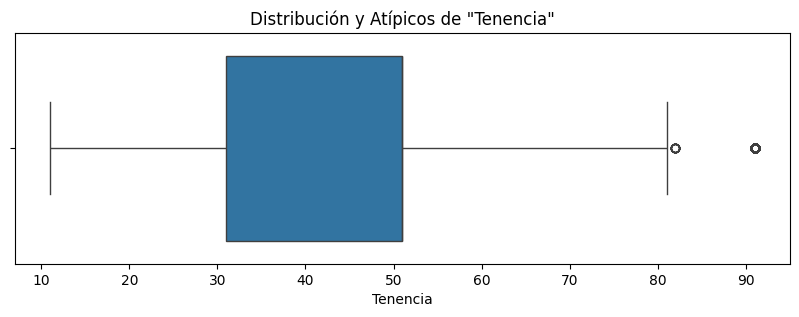



--- An√°lisis de 'Dist Km' ---
  - Nulos: 5 (0.02%)
  - Asimetr√≠a (Skewness): 1.81
  - Media: 25.31
  - Mediana: 21.90


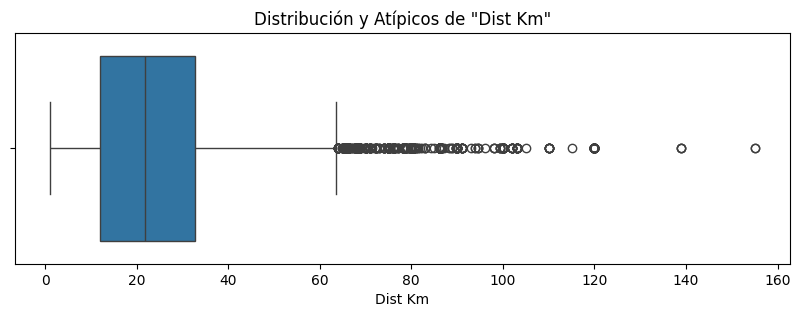



--- An√°lisis de 'Cod. T.Cultivo' ---
  - Nulos: 2 (0.01%)
  - Asimetr√≠a (Skewness): 4.97
  - Media: 1.04
  - Mediana: 1.00


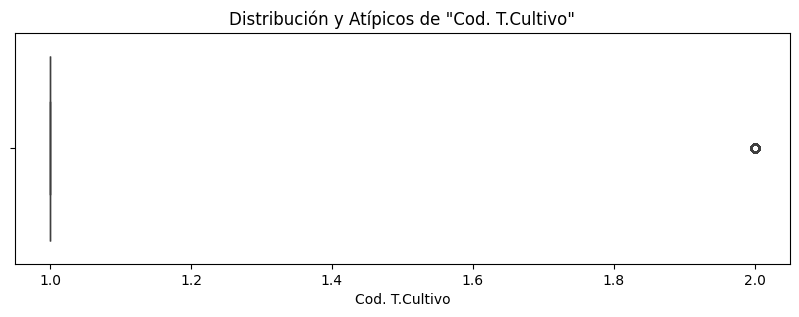



--- An√°lisis de 'Dosis Madurante' ---
  - Nulos: 104 (0.49%)
  - Asimetr√≠a (Skewness): 0.34
  - Media: 0.54
  - Mediana: 0.60


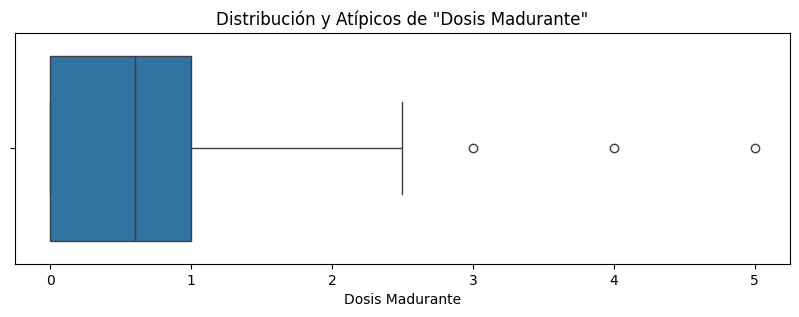



--- An√°lisis de 'Ton.Azucar' ---
  - Nulos: 241 (1.15%)
  - Asimetr√≠a (Skewness): 1.75
  - Media: 124.25
  - Mediana: 93.74


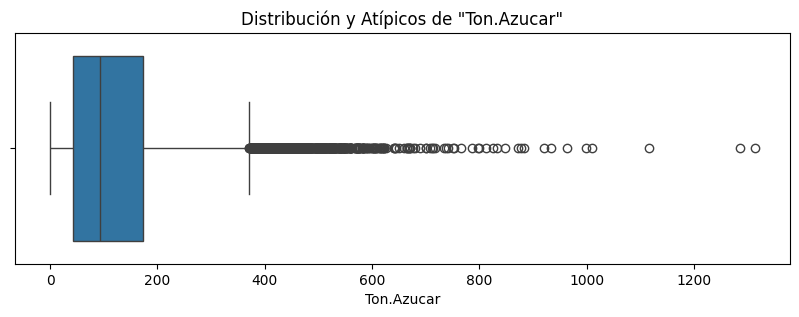



--- An√°lisis de 'Rdto' ---
  - Nulos: 267 (1.27%)
  - Asimetr√≠a (Skewness): -3.20
  - Media: 10.73
  - Mediana: 10.89


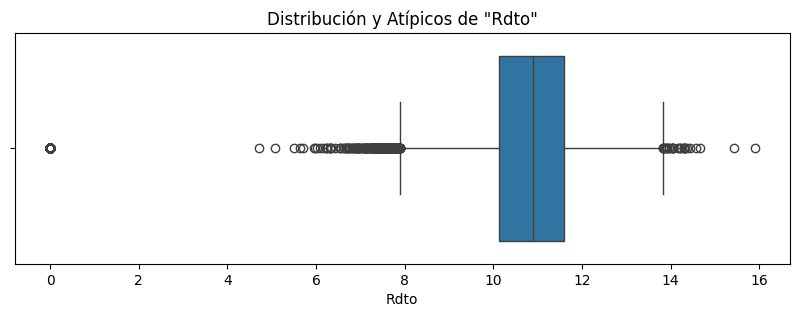



--- An√°lisis de 'TAH' ---
  - Nulos: 241 (1.15%)
  - Asimetr√≠a (Skewness): -0.18
  - Media: 13.89
  - Mediana: 14.01


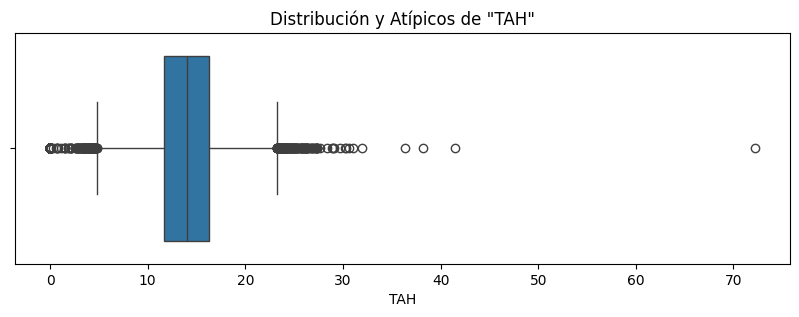



--- An√°lisis de 'TAHM' ---
  - Nulos: 241 (1.15%)
  - Asimetr√≠a (Skewness): -0.20
  - Media: 1.07
  - Mediana: 1.09


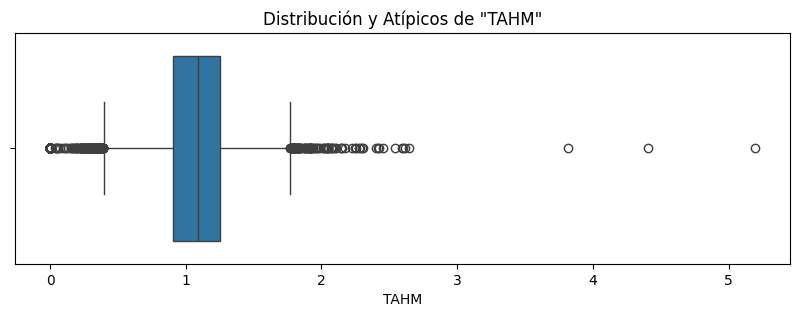



--- An√°lisis de 'Sac.Ca√±a Precosecha' ---
  - Nulos: 1098 (5.22%)
  - Asimetr√≠a (Skewness): 0.20
  - Media: 7.80
  - Mediana: 0.00


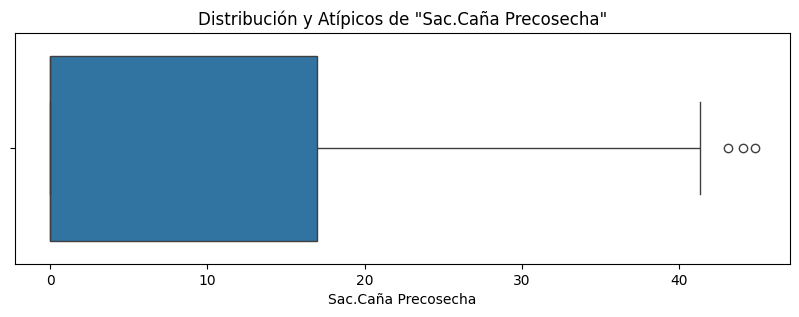



--- An√°lisis de '%Sac.Ca√±a' ---
  - Nulos: 449 (2.14%)
  - Asimetr√≠a (Skewness): -0.26
  - Media: 12.32
  - Mediana: 12.37


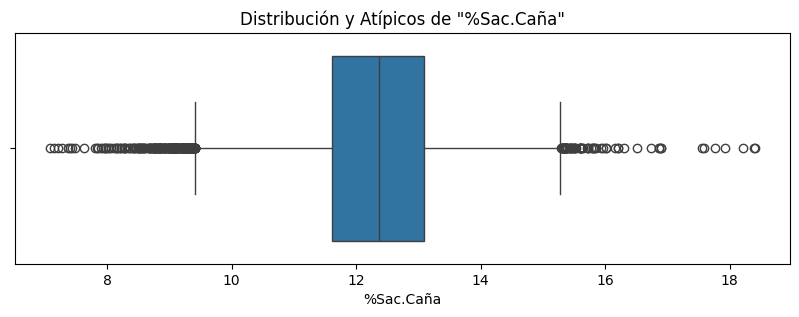



--- An√°lisis de '%Sac.Muestreadora' ---
  - Nulos: 1858 (8.84%)
  - Asimetr√≠a (Skewness): -3.65
  - Media: 12.83
  - Mediana: 13.05


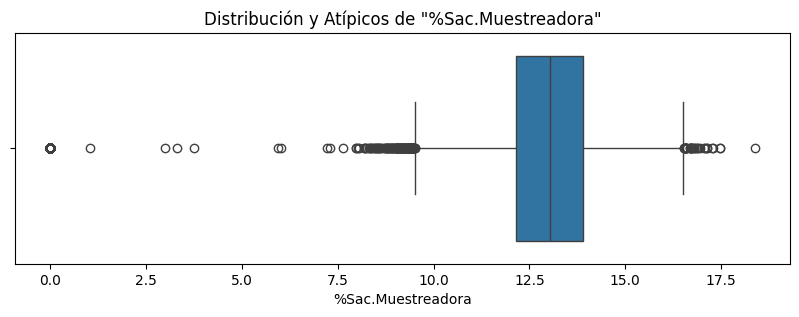



--- An√°lisis de '%ATR' ---
  - Nulos: 522 (2.48%)
  - Asimetr√≠a (Skewness): 35.51
  - Media: 13.72
  - Mediana: 13.75


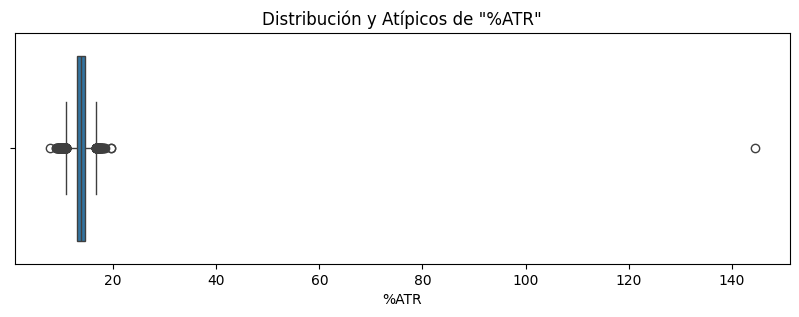



--- An√°lisis de 'KATRHM' ---
  - Nulos: 522 (2.48%)
  - Asimetr√≠a (Skewness): 3.39
  - Media: 1372.45
  - Mediana: 1383.49


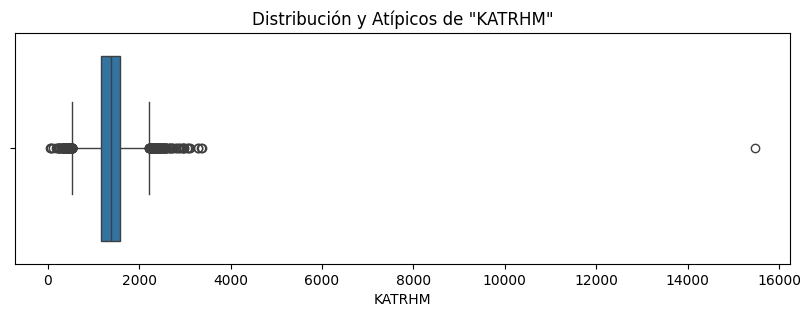



--- An√°lisis de '%Fibra Ca√±a' ---
  - Nulos: 1858 (8.84%)
  - Asimetr√≠a (Skewness): -2.76
  - Media: 15.28
  - Mediana: 15.31


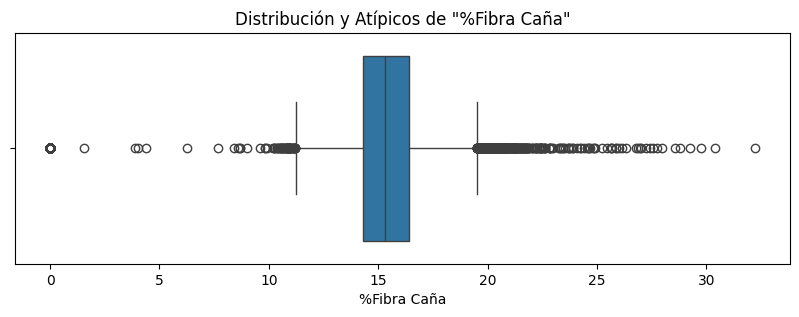



--- An√°lisis de '%ME Min' ---
  - Nulos: 1722 (8.19%)
  - Asimetr√≠a (Skewness): 4.28
  - Media: 0.64
  - Mediana: 0.34


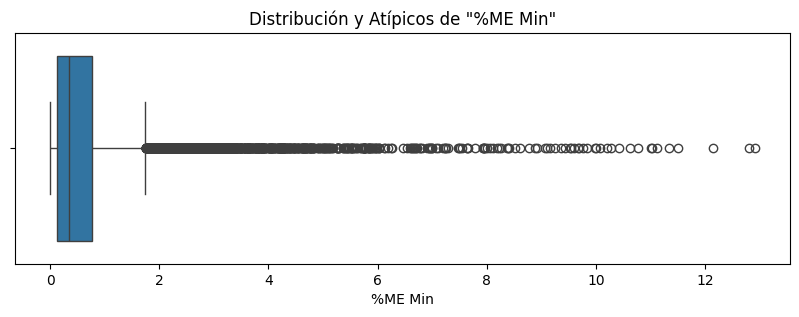



--- An√°lisis de '%ME Veg' ---
  - Nulos: 1720 (8.18%)
  - Asimetr√≠a (Skewness): 21.55
  - Media: 7.76
  - Mediana: 8.09


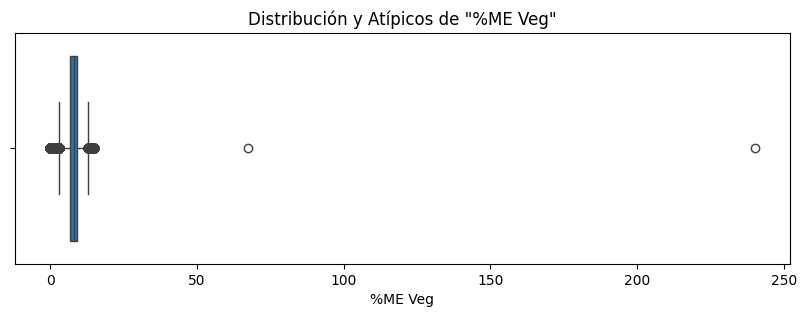



--- An√°lisis de '%ME Tot' ---
  - Nulos: 1720 (8.18%)
  - Asimetr√≠a (Skewness): 0.48
  - Media: 8.60
  - Mediana: 8.67


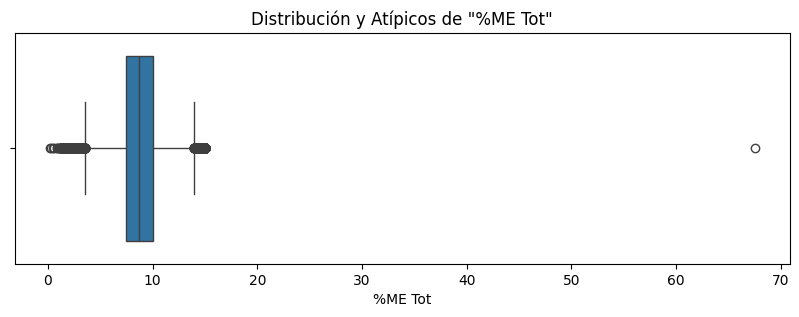



--- An√°lisis de 'Brix' ---
  - Nulos: 267 (1.27%)
  - Asimetr√≠a (Skewness): -2.58
  - Media: 13.13
  - Mediana: 14.31


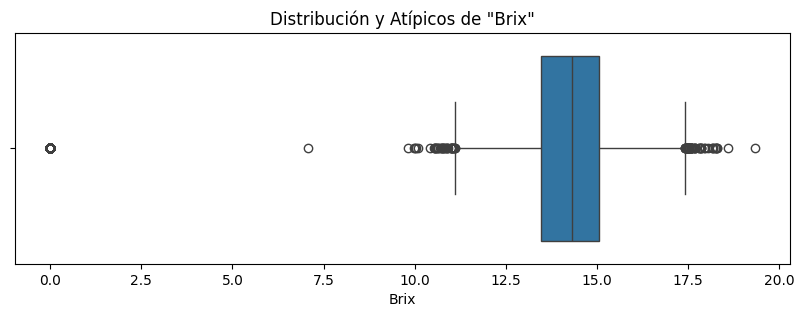



--- An√°lisis de 'Pureza' ---
  - Nulos: 269 (1.28%)
  - Asimetr√≠a (Skewness): -2.83
  - Media: 77.81
  - Mediana: 85.53


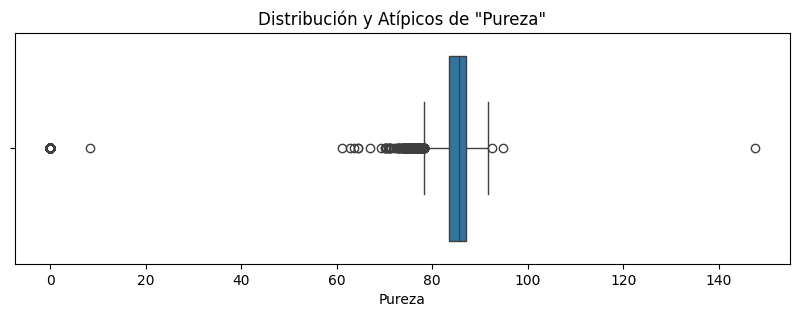



--- An√°lisis de 'Fosfato Jugo' ---
  - Nulos: 1858 (8.84%)
  - Asimetr√≠a (Skewness): 74.03
  - Media: 332.50
  - Mediana: 289.00


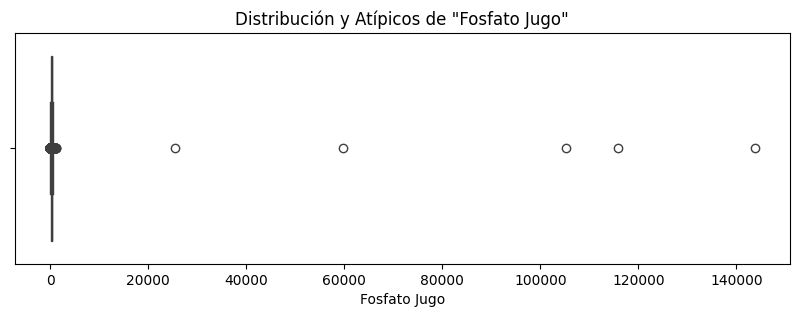

In [15]:
# Iteramos sobre cada columna identificada para la Fase 3
for columna in columnas_fase3:
    # --- C√°lculo de estad√≠sticas ---
    asimetria = df[columna].skew()
    media = df[columna].mean()
    mediana = df[columna].median()
    
    print(f"--- An√°lisis de '{columna}' ---")
    print(f"  - Nulos: {df[columna].isnull().sum()} ({df[columna].isnull().sum() / len(df) * 100:.2f}%)")
    print(f"  - Asimetr√≠a (Skewness): {asimetria:.2f}")
    print(f"  - Media: {media:.2f}")
    print(f"  - Mediana: {mediana:.2f}")
    
    # --- Visualizaci√≥n del Boxplot ---
    plt.figure(figsize=(10, 3)) # Crea una figura nueva para cada gr√°fico
    sns.boxplot(x=df[columna])
    plt.title(f'Distribuci√≥n y At√≠picos de "{columna}"')
    plt.show() # Muestra el gr√°fico en la salida de la celda
    print("\n") # Agrega un espacio para mayor claridad

In [16]:
# Listas para clasificar las columnas
columnas_para_mediana_f3 = []
columnas_para_media_f3 = []

# Umbral de asimetr√≠a para decidir
umbral_asimetria = 1.0

# Clasificamos cada columna bas√°ndonos en su asimetr√≠a
for columna in columnas_fase3:
    asimetria = df[columna].skew()
    
    if abs(asimetria) > umbral_asimetria:
        columnas_para_mediana_f3.append(columna)
    else:
        columnas_para_media_f3.append(columna)

print("--- Clasificaci√≥n Final para Imputaci√≥n (Fase 3) ---")
print(f"‚úÖ Columnas a imputar con MEDIANA (distribuci√≥n asim√©trica):")
print(f"   {columnas_para_mediana_f3}")
print(f"\n‚úÖ Columnas a imputar con MEDIA (distribuci√≥n sim√©trica):")
print(f"   {columnas_para_media_f3}")

--- Clasificaci√≥n Final para Imputaci√≥n (Fase 3) ---
‚úÖ Columnas a imputar con MEDIANA (distribuci√≥n asim√©trica):
   ['Dist Km', 'Cod. T.Cultivo', 'Ton.Azucar', 'Rdto', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Ca√±a', '%ME Min', '%ME Veg', 'Brix', 'Pureza', 'Fosfato Jugo']

‚úÖ Columnas a imputar con MEDIA (distribuci√≥n sim√©trica):
   ['Tenencia', 'Dosis Madurante', 'TAH', 'TAHM', 'Sac.Ca√±a Precosecha', '%Sac.Ca√±a', '%ME Tot']


In [17]:
# Imputar con la MEDIANA
if columnas_para_mediana_f3:
    mediana_imputacion = df[columnas_para_mediana_f3].median()
    df[columnas_para_mediana_f3] = df[columnas_para_mediana_f3].fillna(mediana_imputacion)
    print("-> Valores nulos imputados con la MEDIANA.")

# Imputar con la MEDIA
if columnas_para_media_f3:
    media_imputacion = df[columnas_para_media_f3].mean()
    df[columnas_para_media_f3] = df[columnas_para_media_f3].fillna(media_imputacion)
    print("-> Valores nulos imputados con la MEDIA.")

df[columnas_para_mediana_f3].info()
df[columnas_para_media_f3].info()


-> Valores nulos imputados con la MEDIANA.
-> Valores nulos imputados con la MEDIA.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dist Km            21027 non-null  float64
 1   Cod. T.Cultivo     21027 non-null  float64
 2   Ton.Azucar         21027 non-null  float64
 3   Rdto               21027 non-null  float64
 4   %Sac.Muestreadora  21027 non-null  float64
 5   %ATR               21027 non-null  float64
 6   KATRHM             21027 non-null  float64
 7   %Fibra Ca√±a        21027 non-null  float64
 8   %ME Min            21027 non-null  float64
 9   %ME Veg            21027 non-null  float64
 10  Brix               21027 non-null  float64
 11  Pureza             21027 non-null  float64
 12  Fosfato Jugo       21027 non-null  float64
dtypes: float64(13)
memory usage: 2.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIn

### RE-CHEQUEO Datos nulos

In [18]:
# 1. Identifica las variables o columnas en el dataset con valores nulos
columnas_con_nulos = [
    (columna, df[columna].isnull().sum())
    for columna in df.columns
    if df[columna].isnull().sum() > 0
]
# 2. Convertir la lista a un DataFrame de pandas para una mejor visualizaci√≥n
df_nulos = pd.DataFrame(columnas_con_nulos, columns=['Columna', 'Cantidad de Nulos'])

# Ordenar los resultados de mayor a menor
df_nulos_ordenado = df_nulos.sort_values(by='Cantidad de Nulos', ascending=False)


# Imprimir el DataFrame resultante
print("\nResultados en una tabla ordenada de mayor a menor:")
df_nulos_ordenado


Resultados en una tabla ordenada de mayor a menor:


Columna  Cantidad de Nulos
7  Codigo Estacion              14742
1             D.S.              13859
2        Ult.Riego              12557
5         Producto               9778
4       Fec.Madur.               9775
0            Suelo               3758
6         Cerca de                126
3          Cultivo                  2

## Desarrollo de Modelos

## Validaci√≥n y Evaluaci√≥n

# Modelo de Clasificaci√≥n

## Creaci√≥n de Categor√≠as

## Desarrollo de Modelos de Clasificaci√≥n

## Validaci√≥n y Evaluaci√≥n

# Conclusiones

# Innovaci√≥n y Propuesta de Mejora